In [85]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String,  inspect, func

# allow max columns to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
file_path = "/Users/oliver/Documents/Bootcamp/Final_Project_Group_1/Resources/HR_Data/Clean_HRData.csv"
hr_df = pd.read_csv(file_path)
hr_df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0,51,No,Travel_Rarely,Sales,3.750,2,Life Sciences,1,Female,1,Healthcare Representative,Married,1705.08,1.0,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,1,31,Yes,Travel_Frequently,Research & Development,6.250,1,Life Sciences,2,Female,1,Research Scientist,Single,544.57,0.0,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,2,32,No,Travel_Frequently,Research & Development,10.625,4,Other,3,Male,4,Sales Executive,Married,2512.64,1.0,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,3,38,No,Non-Travel,Research & Development,1.250,5,Life Sciences,4,Male,3,Human Resources,Married,1081.73,3.0,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,4,32,No,Travel_Rarely,Research & Development,6.250,1,Medical,5,Male,1,Sales Executive,Single,304.46,4.0,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


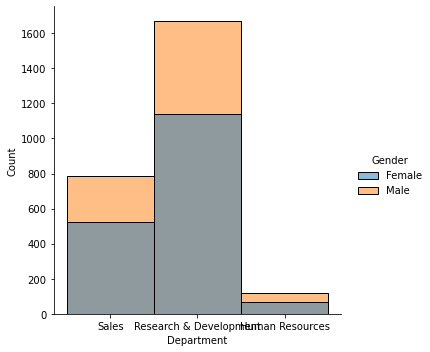

In [79]:
sns.displot(hr_df, x="Department", hue="Gender", legend="full")

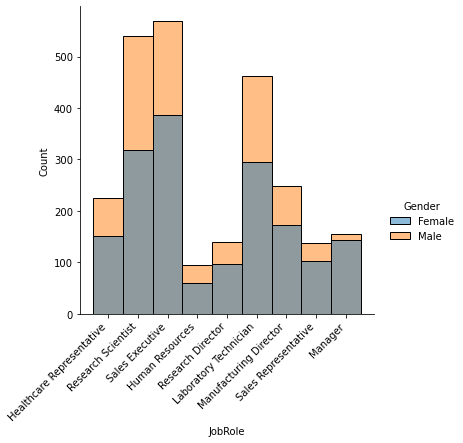

In [81]:
job_gender = sns.displot(hr_df, x="JobRole", hue="Gender", legend="full")
job_gender.set_xticklabels(rotation=45, horizontalalignment='right')

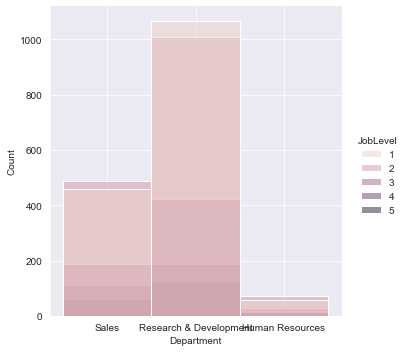

In [97]:

sns.displot(hr_df, x="Department", hue="JobLevel", legend="full")

# Ed.set_xticklabels(rotation=45, horizontalalignment='right')

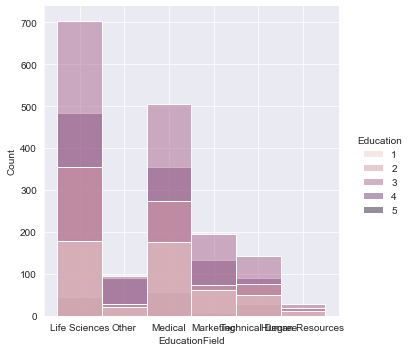

In [98]:
sns.displot(hr_df, x="EducationField", hue="Education", legend="full")

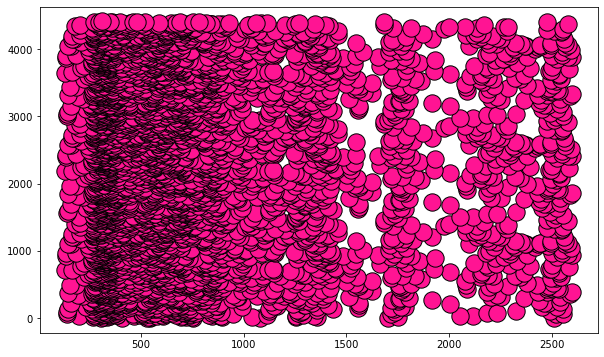

In [3]:
#specify x and y

x= hr_df.MonthlyIncome
y= hr_df.EmployeeID

plt.figure(figsize=(10,6))
plt.scatter(x, y, color="deeppink", s=300, edgecolor="black", linewidths=1)

In [21]:
ed_income_df = pd.DataFrame(hr_df.groupby("EducationField")['MonthlyIncome'].mean())
ed_income_df

,MonthlyIncome
EducationField,
Human Resources,786.800625
Life Sciences,850.105481
Marketing,770.937143
Medical,870.650792
Other,866.657890
Technical Degree,828.332917


In [14]:
ed_income_df.index

Index(['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree'],
      dtype='object', name='EducationField')

<BarContainer object of 6 artists>

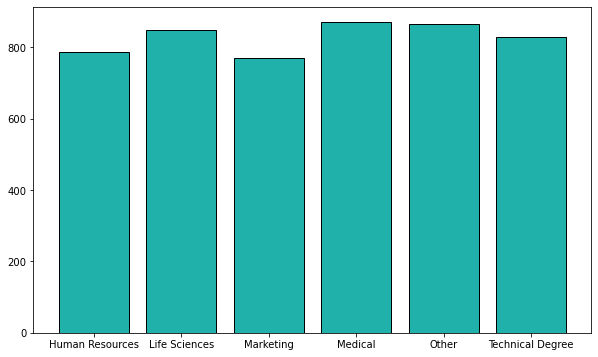

In [22]:
#specify x and y
x= ed_income_df.index.to_list()
y= ed_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="lightseagreen", edgecolor="black")

In [23]:
job_income_df = pd.DataFrame(hr_df.groupby("JobRole")['MonthlyIncome'].mean())
job_income_df

,MonthlyIncome
JobRole,
Healthcare Representative,793.784828
Human Resources,765.656948
Laboratory Technician,867.141044
Manager,813.399130
Manufacturing Director,902.792393
Research Director,851.928723
Research Scientist,845.588708
Sales Executive,845.837521
Sales Representative,845.983900


<BarContainer object of 9 artists>

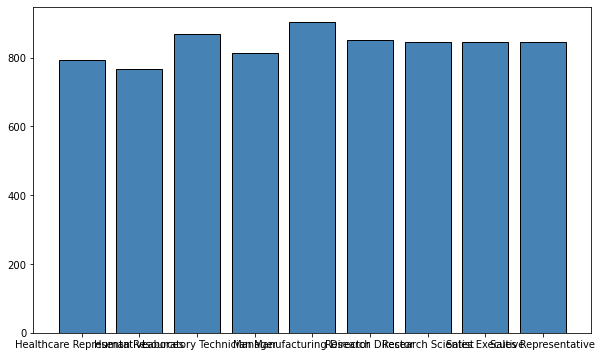

In [24]:
#specify x and y
x= job_income_df.index.to_list()
y= job_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="steelblue", edgecolor="black")

In [25]:
distance_income_df = pd.DataFrame(hr_df.groupby("DistanceFromHome")['MonthlyIncome'].mean())
distance_income_df

,MonthlyIncome
DistanceFromHome,
0.625,960.979755
1.250,803.852459
1.875,743.195556
2.500,859.791892
3.125,857.038280
3.750,725.953256
4.375,806.557520
5.000,862.187106
5.625,906.502430


<BarContainer object of 29 artists>

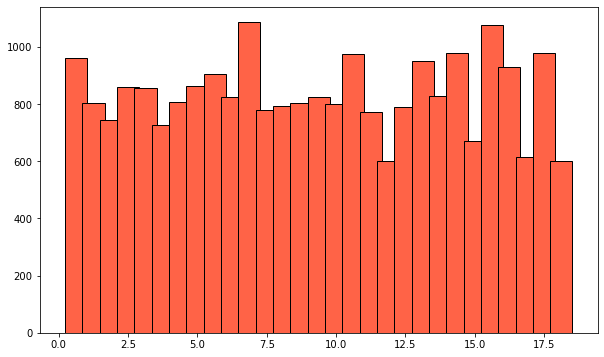

In [26]:
#specify x and y
x= distance_income_df.index.to_list()
y= distance_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="tomato", edgecolor="black")

In [27]:
department_income_df = pd.DataFrame(hr_df.groupby("Department")['MonthlyIncome'].mean())
department_income_df

,MonthlyIncome
Department,
Human Resources,755.492204
Research & Development,874.546541
Sales,796.841316


<BarContainer object of 3 artists>

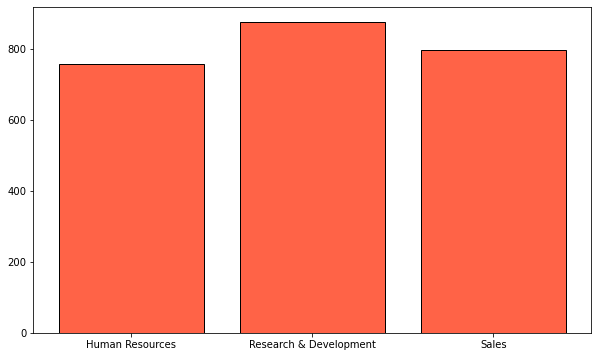

In [29]:
#specify x and y
x= department_income_df.index.to_list()
y= department_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="tomato", edgecolor="black")

In [28]:
travel_income_df = pd.DataFrame(hr_df.groupby("BusinessTravel")['MonthlyIncome'].mean())
travel_income_df

,MonthlyIncome
BusinessTravel,
Non-Travel,957.785932
Travel_Frequently,807.868690
Travel_Rarely,839.676732


<BarContainer object of 3 artists>

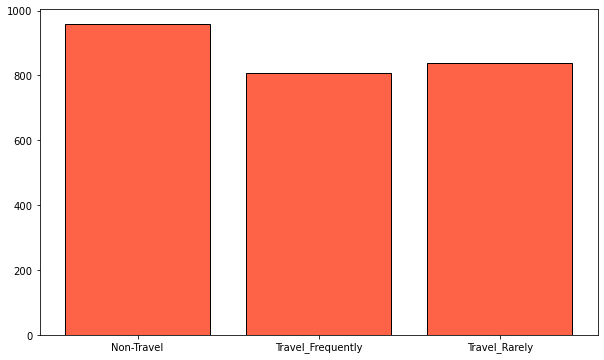

In [30]:
#specify x and y
x= travel_income_df.index.to_list()
y= travel_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="tomato", edgecolor="black")

In [68]:
age_count_df = pd.DataFrame(hr_df.Age.value_counts())
age_count_df = age_count_df.sort_index()
age_count_df

,Age
18,22
19,27
20,33
21,38
22,47
23,42
24,77
25,77
26,111
27,141


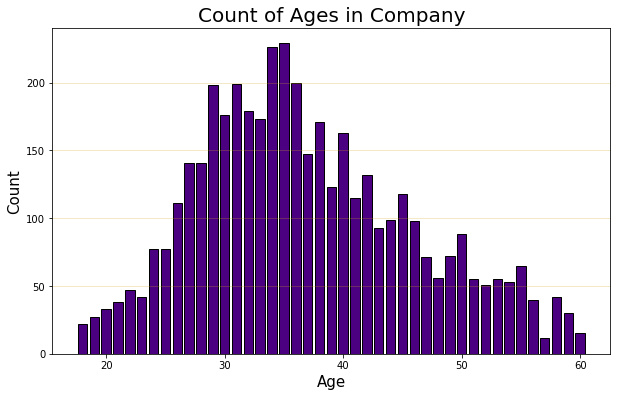

In [71]:
#specify x and y
x= age_count_df.index.to_list()
y= age_count_df.Age

plt.figure(figsize=(10,6))
plt.bar(x, y, color="indigo", edgecolor="black")

plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)#, fontweight='bold')
plt.title("Count of Ages in Company", fontsize=20,) #fontweight='bold')
plt.grid(axis="y", color="goldenrod", linewidth=.5, alpha=.5)

In [31]:
age_income_df = pd.DataFrame(hr_df.groupby("Age")['MonthlyIncome'].mean())
age_income_df

,MonthlyIncome
Age,
18,813.362727
19,1516.363333
20,776.064545
21,1026.719474
22,1059.425319
23,1031.930714
24,726.875584
25,984.265455
26,936.138198


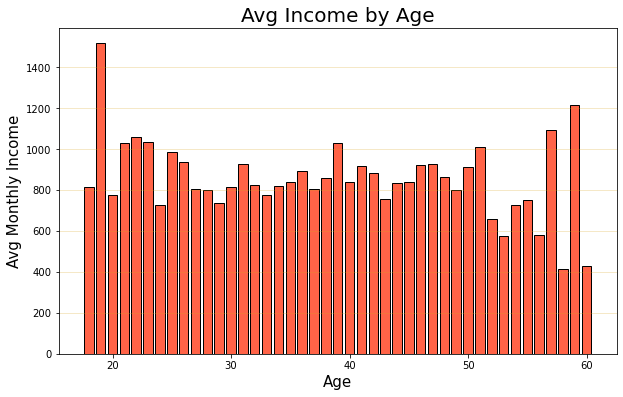

In [75]:
#specify x and y
x= age_income_df.index.to_list()
y= age_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="tomato", edgecolor="black")

plt.xlabel("Age", fontsize=15)
plt.ylabel("Avg Monthly Income", fontsize=15)#, fontweight='bold')
plt.title("Avg Income by Age", fontsize=20,) #fontweight='bold')
plt.grid(axis="y", color="goldenrod", linewidth=.5, alpha=.5)


In [43]:
hr_df[(hr_df.Age == 19) & (hr_df.MonthlyIncome > 1516)]

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
414,414,19,Yes,Travel_Rarely,Research & Development,9.375,3,Life Sciences,431,Male,2,Research Scientist,Single,2088.32,1.0,15,8,1,1.0,3,1,0,0,4.0,2.0,4.0,3,3
574,574,19,No,Travel_Rarely,Research & Development,14.375,4,Life Sciences,596,Male,2,Laboratory Technician,Single,2495.61,1.0,12,8,0,1.0,2,1,0,0,3.0,1.0,3.0,3,3
1320,1320,19,No,Travel_Rarely,Research & Development,0.625,3,Other,1362,Female,5,Manufacturing Director,Single,1976.26,1.0,18,8,3,1.0,2,1,0,0,2.0,2.0,3.0,2,3
1348,1348,19,Yes,Travel_Rarely,Research & Development,5.000,2,Life Sciences,1390,Male,2,Sales Executive,Single,2076.36,1.0,21,8,0,1.0,2,1,1,0,2.0,4.0,2.0,3,4
1844,1844,19,Yes,Travel_Rarely,Research & Development,9.375,3,Life Sciences,1901,Male,2,Research Scientist,Single,2088.32,1.0,15,8,1,1.0,3,1,0,0,4.0,2.0,4.0,3,3
2004,2004,19,No,Travel_Rarely,Research & Development,14.375,4,Life Sciences,2066,Male,2,Laboratory Technician,Single,2495.61,1.0,12,8,0,1.0,2,1,0,0,3.0,1.0,3.0,3,3
2752,2752,19,No,Travel_Rarely,Research & Development,0.625,3,Other,2832,Female,5,Manufacturing Director,Single,1976.26,1.0,18,8,3,1.0,2,1,0,0,2.0,2.0,3.0,2,3
2780,2780,19,Yes,Travel_Rarely,Research & Development,5.000,2,Life Sciences,2860,Male,2,Sales Executive,Single,2076.36,1.0,21,8,0,1.0,2,1,1,0,2.0,4.0,2.0,3,4
3280,3280,19,Yes,Travel_Rarely,Research & Development,9.375,3,Life Sciences,3371,Male,2,Research Scientist,Single,2088.32,1.0,15,8,1,1.0,3,1,0,0,4.0,2.0,4.0,3,3
3441,3441,19,No,Travel_Rarely,Research & Development,14.375,4,Life Sciences,3536,Male,2,Laboratory Technician,Single,2495.61,1.0,12,8,0,1.0,2,1,0,0,3.0,1.0,3.0,3,3


In [35]:
gender_income_df = pd.DataFrame(hr_df.groupby("Gender")['MonthlyIncome'].mean())
gender_income_df

,MonthlyIncome
Gender,
Female,841.195639
Male,848.859599


<BarContainer object of 2 artists>

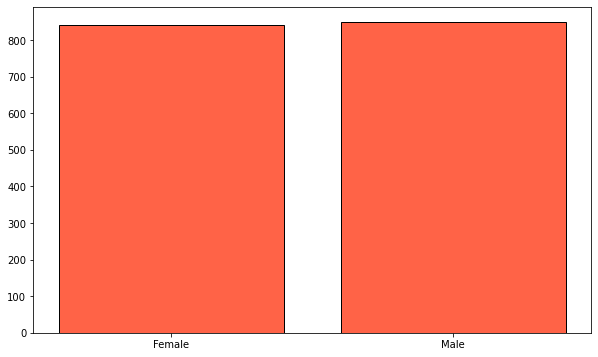

In [36]:
#specify x and y
x= gender_income_df.index.to_list()
y= gender_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="tomato", edgecolor="black")

In [44]:
marital_income_df = pd.DataFrame(hr_df.groupby("MaritalStatus")['MonthlyIncome'].mean())
marital_income_df

,MonthlyIncome
MaritalStatus,
Divorced,888.060274
Married,858.350518
Single,798.830622


<BarContainer object of 3 artists>

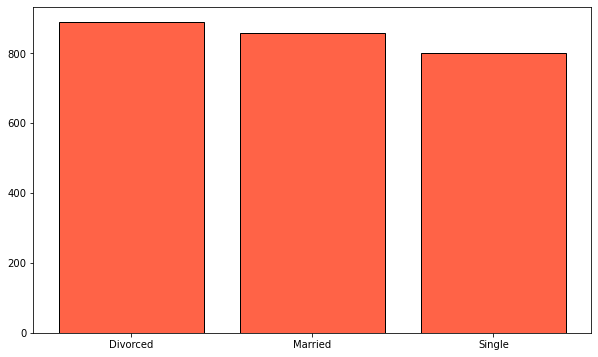

In [45]:
#specify x and y
x= marital_income_df.index.to_list()
y= marital_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="tomato", edgecolor="black")

In [76]:
ed_level_income_df = pd.DataFrame(hr_df.groupby("Education")['MonthlyIncome'].mean())
ed_level_income_df

,MonthlyIncome
Education,
1,800.476693
2,850.309939
3,873.796479
4,818.772611
5,871.684357


<BarContainer object of 5 artists>

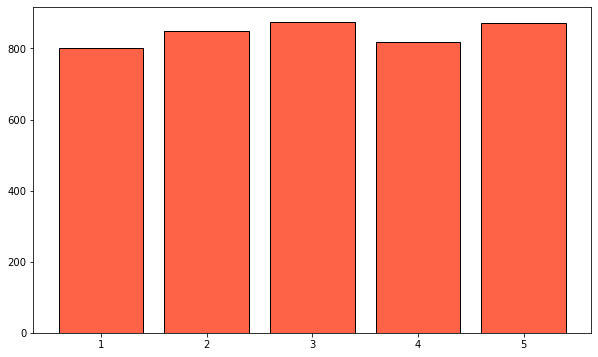

In [77]:
#specify x and y
x= ed_level_income_df.index.to_list()
y= ed_level_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="tomato", edgecolor="black")

In [48]:
dept_job_income_df = pd.DataFrame(hr_df.groupby(["Department", "JobRole"])['MonthlyIncome'].mean())
dept_job_income_df

MonthlyIncome
Department             JobRole                                 
Human Resources        Healthcare Representative    1261.650000
                       Human Resources               261.820000
                       Laboratory Technician        1028.847368
                       Manager                      1138.843333
                       Manufacturing Director        723.970000
                       Research Director             967.980000
                       Research Scientist            686.096667
                       Sales Executive               583.219245
                       Sales Representative          367.315000
Research & Development Healthcare Representative     772.756920
                       Human Resources               840.017477
                       Laboratory Technician         882.648870
                       Manager                       869.250498
                       Manufacturing Director        931.904058
                       Research Director             884.472649
                       Research Scientist            889.849063
                       Sales Executive               878.863626
                       Sales Representative          862.225747
Sales                  Healthcare Representative     806.507983
                       Human Resources               619.178182
                       Laboratory Technician         810.885519
                       Manager                       654.352809
                       Manufacturing Director        872.111393
                       Research Director             786.962222
                       Research Scientist            775.354440
                       Sales Executive               823.642083
                       Sales Representative          899.037455

TypeError: unhashable type: 'numpy.ndarray'

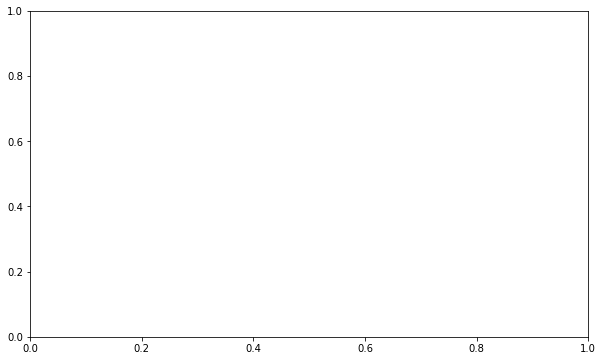

In [49]:
#specify x and y
x= dept_job_income_df.index.to_list()
y= dept_job_income_df.MonthlyIncome

plt.figure(figsize=(10,6))
plt.bar(x, y, color="tomato", edgecolor="black")

In [ ]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x= dept_job_income_df.index.to_list() # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
rects3

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(x, labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()